In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.shape

(891, 12)

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
for col in train_data.columns:
  print(col," : ",train_data[col].nunique())

PassengerId  :  891
Survived  :  2
Pclass  :  3
Name  :  891
Sex  :  2
Age  :  88
SibSp  :  7
Parch  :  7
Ticket  :  681
Fare  :  248
Cabin  :  147
Embarked  :  3


In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


#As the values under the columns are objects I changed it in the Training data and Test Data

In [ ]:
mapping = {'S':4,'C':5,'Q':6}
train_data['Embarked'] = train_data['Embarked'].map(mapping)


In [ ]:
test_data['Embarked'] = test_data['Embarked'].map(mapping)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,5.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,4.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,4.0


In [ ]:
mapping = {'female':1, 'male':2}
train_data['Sex'] = train_data['Sex'].map(mapping)
test_data['Sex'] = test_data['Sex'].map(mapping)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,5.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,4.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,4.0
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,4.0


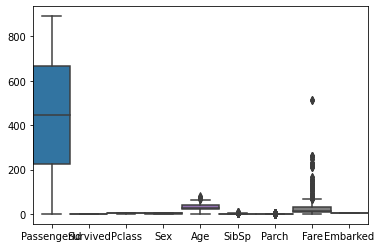

In [ ]:
plt.figure()
sns.boxplot(data = train_data, width = 1)
plt.show()

#Outliers of the dataset can be identified

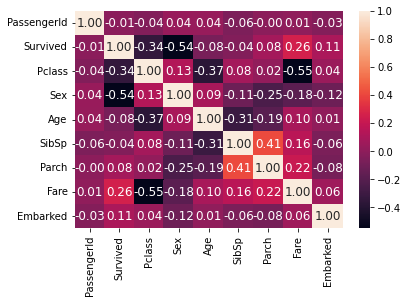

In [ ]:
analyse = plt.subplots()
sns.heatmap(train_data.corr(), annot = True, fmt = '1.2f', annot_kws={'size':12})
plt.show()

#The heatmap shows us the relations between one

In [ ]:
train_data.drop(['Name','PassengerId','Ticket','Fare','Cabin'], axis = 1, inplace= True)
test_data.drop(['Name','PassengerId','Ticket','Fare','Cabin'], axis = 1, inplace= True)

#Since Name, PassengerId, Ticket, Fare, Cabin are irrelevant to survival rate we drop them

In [ ]:
empty_list = list(train_data.isnull().sum()[train_data.isnull().sum() > 0].index)
print(empty_list)

['Age', 'Embarked']


In [ ]:
for col in empty_list:
  median = train_data[col].median()
  train_data[col].fillna(median, inplace=True)
  test_data[col].fillna(median, inplace=True)

# we find the features with empty rows and insert median

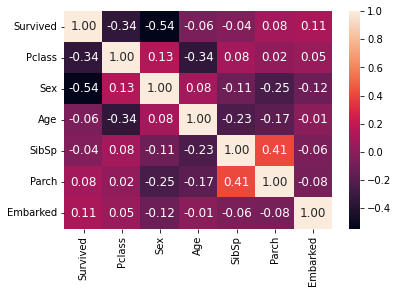

In [ ]:
analyse = plt.subplots()
sns.heatmap(train_data.corr(), annot = True, fmt = '1.2f', annot_kws={'size':12})
plt.show()

In [ ]:
train_data.info()
#Since all our features are now int or floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
x = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']
Y = train_data['Survived']

In [ ]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(x)

#Scaling is done for SVM and logistic regression

In [ ]:
train_data

array([[1.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.        ],
       [0.        , 0.        , 0.4722292 , 0.125     , 0.        ,
        0.5       ],
       [1.        , 0.        , 0.32143755, 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.34656949, 0.125     , 0.33333333,
        0.        ],
       [0.        , 1.        , 0.32143755, 0.        , 0.        ,
        0.5       ],
       [1.        , 1.        , 0.39683338, 0.        , 0.        ,
        1.        ]])

In [ ]:
from sklearn.svm import SVC

#Using SVM

In [ ]:
mod=SVC()

In [ ]:
mod.fit(train_data,y)

SVC()

In [ ]:
mod.predict(test_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.model_selection import train_test_split
m_train,m_test,n_train,n_test=train_test_split(train_data,y,test_size=0.2, random_state = 1, stratify = y)

In [ ]:
mod.fit(m_train,n_train)

SVC()

In [ ]:
mod.score(m_test,n_test)

0.8268156424581006

In [ ]:
#Using Accurary score to find the accuracy of the prediction
from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
trial_svc = SVC()
trial_svc.fit(m_train, n_train)
pred = trial_svc.predict(m_test)
pred1 = trial_svc.predict(n_test)
acc = accuracy_score(n_test, pred)
acc1 = accuracy_score(n_train,pred1)
print(acc, acc1)

0.8268156424581006


In [ ]:
#Using Logistic Rregression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(m_train, n_train)
pred = log.predict(m_test)
acc= accuracy_score(n_test, pred)
print(acc)

0.8212290502793296


In [ ]:
#Using the Random Forest Classifier with the best parameters computed by using GridSearchCV which you will in further scrolling
 from sklearn.ensemble import RandomForestClassifier
 mod2=RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=5, min_samples_split=2)
 mod2.fit(m_train,n_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [ ]:
mod2.score(m_test,n_test)

0.8268156424581006

In [ ]:
pred = mod2.predict(m_test)
acc= accuracy_score(n_test, pred)
print(acc)

0.8212290502793296


In [ ]:
#Using Decision Tree with no parameters
from sklearn.tree import DecisionTreeClassifier
mod3=DecisionTreeClassifier()
mod3.fit(m_train,n_train)
mod3.score(m_test,n_test)

0.8100558659217877

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
params = {"criterion":['gini', 'entropy'],
          "max_depth":[2,3,4,5,6,7,8,9,10,12,14,16,18,20,24],
          "min_samples_split":[2,3,4,5,6,7,9,11,13]
          }
paramsmod = DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(estimator = paramsmod, scoring = "accuracy", param_grid = params, cv = 5, verbose = True, n_jobs = -1 )
grid_search.fit(x,y)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16,
                                       18, 20, 24],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 9, 11, 13]},
             scoring='accuracy', verbose=True)

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [ ]:
#By Hyper Tuning of the Decision Tree
mod_new=DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_split=2, criterion="entropy")
mod_new.fit(m_train,n_train)
mod_new.score(m_test,n_test)

0.8547486033519553

In [ ]:
mod_new.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,